# Analysing Used Cars Listings on eBay


We will be working on a dataset of used cars from *eBay Kleinanzeigen*, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website.

The dataset was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data).  The version of the dataset we are working with is a sample of 50,000 data points that was prepared by Dataquest including simulating a less-cleaned version of the data.

The data dictionary provided with data is as follows:

- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which which year the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which which year the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.

In [312]:
# Importing relevant libraries
import pandas as pd
import numpy as np

In [313]:
# Reading in our data set as a pandas DataFrame 'autos'
autos = pd.read_csv('autos.csv', encoding='Latin-1')
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


From the above information, we can deduce that:
 1. The column names are inconsistent
 2. Some columns like price and odometer have wrong datatypes
 3. Columns like Vehicletype, model, gearbox, fueltype, notrepaireddamage have missing values.
 
Let's start by cleaning the columns.

In [314]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

We'll make a few changes here:

- Change the columns from camelcase to snakecase.
- Change a few wordings to more accurately describe the columns.

In [315]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

In [316]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We have changed the name of the columns to facilitate easier access in the future and to comply with the convention.

## Initial Data Explorationg and Cleaning

We'll start with exploring the data

In [317]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-04 16:40:33,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Our initial observations:

- There are a number of text columns where all (or nearly all) of the values are the same:
    - `seller`
    - `offer_type`
- The `num_photos` column looks odd, we'll need to investigate this further.
- Columns `price` and `odometer` shows wrong datatype, we'll need to clean these columns.

In [318]:
autos['num_photos'].value_counts(dropna=False)

0    50000
Name: num_photos, dtype: int64

The `num_photos` column has only value 0 in all rows. We will remove this column along with `seller` and `offer_type` that have the same values.

In [319]:
autos = autos.drop(['num_photos','seller','offer_type'], axis=1)

Now, `price` and `odometer` column both shows `object` datatype becuase they have extra characters. We'll clean these columns and convert these.

In [320]:
print(autos['price'].head())
print('\n')
print(autos['odometer'].head())

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object


0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object


In [321]:
# Removing the extra characters from both these columns.
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')
autos['odometer'] = autos['odometer'].str.replace('km','')
autos['odometer'] = autos['odometer'].str.replace(',','')

In [322]:
# Changing their datatypes to int.
autos['price'] = autos['price'].astype(int)
autos['odometer'] = autos['odometer'].astype(int)

In [323]:
# Renaming column 'odometer' to 'odometer_km'.
autos.rename({'odometer':'odometer_km'}, axis=1, inplace=True)

In [324]:
print(autos['price'].head())
print('\n')
print(autos['odometer_km'].head())

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32


0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32


## Exploring Odometer and Price Columns

In [325]:
autos['odometer_km'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field.  Additionally, there are more high mileage than low mileage vehicles.

In [326]:
print(autos['price'].describe().apply(lambda x: format(x, 'f')))
print('\n')
print(autos['price'].value_counts().head(20))

count       50000.000000
mean         9840.043760
std        481104.380500
min             0.000000
25%          1100.000000
50%          2950.000000
75%          7200.000000
max      99999999.000000
Name: price, dtype: object


0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: price, dtype: int64


There are 1,421 cars listed with $0 price - given that this is only 2% of the of the cars, we can consider removing these rows. The maximum price is one hundred million dollars, which seems a lot, let's look at the highest prices further.

In [327]:
autos['price'].value_counts().sort_index(ascending=False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [328]:
autos['price'].value_counts().sort_index(ascending=True).head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

There are listings with price below 30 including 1421 at zero prices. There are 14 listings which are `$1` million or above. Since eBay is an auction site, there could be items starting from `$1`. We will keep all listings starting from `$1` till `$3,50,000` as it seems numbers go up unrealistically after this number.

In [329]:
autos = autos[autos['price'].between(1,351000)]

We have removed all the outliers from the data in column `price`
We did this so that our analysis is more accurate and produces good results. Outliers can really affect our analysis efficiency and accuracy.

## Exploring the Date columns

There are a number of columns with date information:

- `date_crawled`
- `registration_month`
- `registration_year`
- `ad_created`
- `last_seen`

These are a combination of dates that were crawled, and dates with meta-information from the crawler. The non-registration dates are stored as strings.

We'll explore each of these columns to learn more about the listings.

In [330]:
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [331]:
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

It is looking like the site was crawled daily over roughly a one month period in March and April 2016.  The distribution of listings crawled on each day is roughly uniform.

In [332]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.
The last three entries shows disproportionate 'last seen' values. It is unlikely that there was massive sales spike and it might be just becuase of the crawling period ending.

In [333]:
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
2015-12-30    0.000021
2016-01-03    0.000021
2016-01-07    0.000021
2016-01-10    0.000041
2016-01-13    0.000021
2016-01-14    0.000021
2016-01-16    0.000021
2016-01-22    0.000021
2016-01-27    0.000062
2016-01-29    0.000021
2016-02-01    0.000021
2016-02-02    0.000041
2016-02-05    0.000041
2016-02-07    0.000021
2016-02-08    0.000021
2016-02-09    0.000021
2016-02-11    0.000021
2016-02-12    0.000041
2016-02-14    0.000041
2016-02-16    0.000021
2016-02-17    0.000021
2016-02-18    0.000041
2016-02-19    0.000062
2016-02-20    0.000041
2016-02-21    0.000062
                ...   
2016-03-09    0.033151
2016-03-10    0.031895
2016-03-11    0.032904
2016-03-12    0.036755
2016-03-13    0.017008
2016-03-14    0.035190
2016-03-15    0.034016
2016-03-16    0.030125
2016-03-17    0.031278
2016-03-18    0.013590
2016-03-19    0.033687
2016-03-20    0.037949
2016-03-21 

There is a large variety of ad created dates.  Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [334]:
autos['registration_year'].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The year that the car was first registered will likely indicate the age of the car.  Looking at this column, we note some odd values. The minimum value is `1000`, long before cars were invented and the maximum is `9999`, many years into the future.

## Dealing with Incorrect Registration Year Data

Because a car can't be first registered before the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate.  Determining the earliest valid year is more difficult.  Realistically, it could be somewhere in the first few decades of the 1900s.

One option is to remove the listings with these values.  Let's determine what percentage of our data has invalid values in this column:

In [335]:
(~autos['registration_year'].between(1900,2016)).sum() / autos.shape[0]

0.038793369710697

Given that it is less than 4% of the data, we can remove these rows.

In [336]:
autos = autos[autos['registration_year'].between(1900,2016)]

In [337]:
autos['registration_year'].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

We can see after removing the unusual data points from registration_year, the highest number of registration_year we have is 2000 which is more than 67% of the total data. Also, it appears most vehicles were registered in the past 20 years.

## Exploring Price by Brand

In [338]:
autos['brand'].value_counts(normalize=True)

volkswagen        0.211264
bmw               0.110045
opel              0.107581
mercedes_benz     0.096463
audi              0.086566
ford              0.069900
renault           0.047150
peugeot           0.029841
fiat              0.025642
seat              0.018273
skoda             0.016409
nissan            0.015274
mazda             0.015188
smart             0.014160
citroen           0.014010
toyota            0.012703
hyundai           0.010025
sonstige_autos    0.009811
volvo             0.009147
mini              0.008762
mitsubishi        0.008226
honda             0.007840
kia               0.007069
alfa_romeo        0.006641
porsche           0.006127
suzuki            0.005934
chevrolet         0.005698
chrysler          0.003513
dacia             0.002635
daihatsu          0.002506
jeep              0.002271
subaru            0.002142
land_rover        0.002099
saab              0.001649
jaguar            0.001564
daewoo            0.001500
trabant           0.001392
r

The top 4 brands out of 5 are German manufacturers which constitutes more than 50% of the data and there are brands. Volkswagen is by far the most popular brand consisiting of more than 21% of the listings. There are lots of brands that don't have a significant percentage of listings, so we will limit to the brands with more than 5% of the total listings.

In [339]:
brands = autos['brand'].value_counts(normalize=True)
common_brands = brands[brands > 0.05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [340]:
brands_mean_price = {}

for brand in common_brands:
    selected_rows = autos[autos['brand'] == brand]
    mean_price = selected_rows['price'].mean()
    brands_mean_price[brand] = int(mean_price)

brands_mean_price

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}

Of the top 5 brands, there is a distinct price gap:

- Audi, BMW and Mercedes Benz are more expensive
- Ford and Opel are less expensive
- Volkswagen is in between - this may explain its popularity.

## Exploring Mileage

In [341]:
brands_mean_mileage = {}

for brand in common_brands:
    selected_rows = autos[autos['brand'] == brand]
    brands_mean_mileage[brand] = int(selected_rows['odometer_km'].mean())

In [342]:
brands_mean_mileage

{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [343]:
price_mean_series = pd.Series(brands_mean_price)
mileage_mean_series = pd.Series(brands_mean_mileage)

In [344]:
price_mean_series

volkswagen       5402
bmw              8332
opel             2975
mercedes_benz    8628
audi             9336
ford             3749
dtype: int64

In [345]:
mileage_mean_series

volkswagen       128707
bmw              132572
opel             129310
mercedes_benz    130788
audi             129157
ford             124266
dtype: int64

In [346]:
brands_price_mileage = pd.DataFrame(price_mean_series, columns=['mean_price'])

In [347]:
brands_price_mileage['mean_mileage'] = mileage_mean_series

In [348]:
brands_price_mileage

,mean_price,mean_mileage
volkswagen,5402,128707
bmw,8332,132572
opel,2975,129310
mercedes_benz,8628,130788
audi,9336,129157
ford,3749,124266


We can see that BMW has the highest mean_mileage. The range of mileage does not vary that much as prices do by brand. There is a slight trend of expensive vehicles having higher mileage and less expensive vehicles having low mileage.

## Data Cleaning

Some of the columns require some more data cleaning.

Columns like `vehicle_type`, `gearbox`, `fuel_type` and `unrepaired_damage` contains words in German language which we will translate into English language.

In [349]:
autos['vehicle_type'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', nan, 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [350]:
# We have made a mapping dictionary to change the values in vehicle_type column
vehicle_map = {'kleinwagen': 'small car',
               'limousine': 'limousine',
               'bus': 'bus',
               'coupe': 'coupe',
               'suv': 'suv',
               'kombi': 'van',
               'andere': 'other',
               'cabrio': 'covertible'}

# Assigning new values back to the column using dictionary created above
autos['vehicle_type'] = autos['vehicle_type'].map(vehicle_map)

In [351]:
autos['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [352]:
gearbox_map = {'manuell':'manual','automatik':'automatic'}

autos['gearbox'] = autos['gearbox'].map(gearbox_map)

In [353]:
autos['fuel_type'].unique()

array(['lpg', 'benzin', 'diesel', nan, 'cng', 'hybrid', 'elektro',
       'andere'], dtype=object)

In [354]:
fuel_map = {'benzin':'petrol',
           'diesel':'diesel',
           'lpg':'lpg',
           'cng':'cng',
           'hybrid':'hybrid',
           'elektro':'electric',
           'andere':'other'}

autos['fuel_type'] = autos['fuel_type'].map(fuel_map)

In [355]:
autos['unrepaired_damage'].value_counts(dropna=False)

nein    33834
NaN      8307
ja       4540
Name: unrepaired_damage, dtype: int64

In [356]:
damage_map = {'nein':'no',
             'ja':'yes'}
autos['unrepaired_damage'] = autos['unrepaired_damage'].map(damage_map)

In [357]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatic,286,7er,150000,6,petrol,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manual,102,golf,70000,7,petrol,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,petrol,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,van,2003,manual,0,focus,150000,7,petrol,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


We found words in German and we Translated those into English language.

## Converting dates into Numeric Form

We are now going to convert dates into a uniform numeric form.

In [358]:
autos['date_crawled'] = autos['date_crawled'].str[:10].str.replace('-','').astype(int)
autos['ad_created'] = autos['ad_created'].str[:10].str.replace('-','').astype(int)
autos['last_seen'] = autos['last_seen'].str[:10].str.replace('-','').astype(int)

In [359]:
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,20160326,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatic,286,7er,150000,6,petrol,bmw,no,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manual,102,golf,70000,7,petrol,volkswagen,no,20160326,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,petrol,smart,no,20160312,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,van,2003,manual,0,focus,150000,7,petrol,ford,no,20160401,39218,20160401


## Finding Most Commong Brand/Model Combinations

We are going to find top brand/model combinations using `model` and `brand` columns.

In [372]:
combination = autos[['model','brand']]

In [361]:
combination = combination.dropna()

In [362]:
# Creating a new column 'brand_model' for our analysis
combination['brand_model'] = combination['brand'] + ' - ' + combination['model']
combination.head()

,model,brand,brand_model
0,andere,peugeot,peugeot - andere
1,7er,bmw,bmw - 7er
2,golf,volkswagen,volkswagen - golf
3,fortwo,smart,smart - fortwo
4,focus,ford,ford - focus


In [363]:
combination['brand_model'].value_counts().head(10)

volkswagen - golf           3707
bmw - 3er                   2615
volkswagen - polo           1609
opel - corsa                1592
volkswagen - passat         1349
opel - astra                1348
audi - a4                   1231
mercedes_benz - c_klasse    1136
bmw - 5er                   1132
mercedes_benz - e_klasse     958
Name: brand_model, dtype: int64

From the analysis of brand/model combinations, we can say that:
- Volkswagen's golf is the most sought after vehicle.
- BMW's 3er has the second highest number of car listings.
- Volkswagen's polo has the third highest however much less listings from the top two.

## Exploring Prices based on Mileage

In [373]:
price_per_mileage = autos[['price','odometer_km']]
price_per_mileage.head()

,price,odometer_km
0,5000,150000
1,8500,150000
2,8990,70000
3,4350,70000
4,1350,150000


In [375]:
mileage_groups = price_per_mileage.groupby('odometer_km')['price'].mean()
mileage_groups

odometer_km
5000       8873.515924
10000     20550.867220
20000     18448.477089
30000     16608.836842
40000     15499.568381
50000     13812.173212
60000     12385.004433
70000     10927.182814
80000      9721.947636
90000      8465.025105
100000     8132.697279
125000     6214.022030
150000     3767.927107
Name: price, dtype: float64

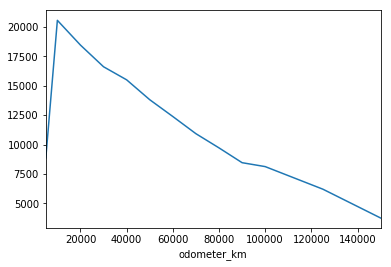

In [388]:
# Plotting a line plot to see patterns in average price changes with mileage
mileage_groups.plot.line()

We can see that as mileage increases, the average price of the car decreases. But at mileage of `5000`, the average price is approximately `8873`, which is low as per the trends we are seeing in the line plot. This needs further investigation.

In [398]:
price_per_mileage['price'][price_per_mileage['odometer_km'] == 5000].count()

785

In [421]:
(price_per_mileage['price'][price_per_mileage['odometer_km'] == 5000] < 100).sum()

74

We can see that price of cars at `5000` mileage has 74 values that are less than `$100` which is almost 10% of the values. Including this there are many prices that are low and are dragging down the mean.

## Damaged Cars

We are now going to check if damaged cars are priced less than non-damaged cars.

In [445]:
# Created a new DataFrame 'damage' and dropped all rows with null values
damage = autos[['unrepaired_damage','price']]
damage = damage.dropna()
damage.head()

,unrepaired_damage,price
0,no,5000
1,no,8500
2,no,8990
3,no,4350
4,no,1350


In [448]:
price_damage_grouped = damage.groupby('unrepaired_damage')['price'].mean()
price_damage_grouped

unrepaired_damage
no     7164.033103
yes    2241.146035
Name: price, dtype: float64

In [454]:
(1 - price_damage_grouped['yes'] / price_damage_grouped['no']) * 100

68.71669905646291

On an average, cars with any damage are approximately 68% cheaper than their non-damaged counterparts.